___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()     # Datamızı yükledik aşağıda dataframe e çevireceğiz

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer["target_names"]) # 'malignant': kötü huylu kanser hücresi 'benign': İyi huylu kanser hücresi

['malignant' 'benign']


In [7]:
print(cancer["DESCR"])
# radius : yarıçap
# texture : doku
# perimeter: Çevre
# area     : Alan
# smoothness: yarıçapın uzunluğundaki değişim
# compactness: Yoğunluk
# concave points: Konkavlıkla ilgili
# fractal dimension : Fraktal; matematikte, çoğunlukla kendine benzeme veya oransal kırılma özelliği 
# .. gösteren karmaşık geometrik şekillerin ortak adıdır. 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names']) # Yukarıda
df_feat.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       17.990        10.380         122.800   1001.000            0.118   
1       20.570        17.770         132.900   1326.000            0.085   
2       19.690        21.250         130.000   1203.000            0.110   
3       11.420        20.380          77.580    386.100            0.142   
4       20.290        14.340         135.100   1297.000            0.100   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.278           0.300                0.147          0.242   
1             0.079           0.087                0.070          0.181   
2             0.160           0.197                0.128          0.207   
3             0.284           0.241                0.105          0.260   
4             0.133           0.198                0.104          0.181   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.079         1.095          0.905            8.589   
1                   0.057         0.543          0.734            3.398   
2                   0.060         0.746          0.787            4.585   
3                   0.097         0.496          1.156            3.445   
4                   0.059         0.757          0.781            5.438   

   area error  smoothness error  compactness error  concavity error  \
0     153.400             0.006              0.049            0.054   
1      74.080             0.005              0.013            0.019   
2      94.030             0.006              0.040            0.038   
3      27.230             0.009              0.075            0.057   
4      94.440             0.011              0.025            0.057   

   concave points error  symmetry error  fractal dimension error  \
0                 0.016           0.030                    0.006   
1                 0.013           0.014                    0.004   
2                 0.021           0.022                    0.005   
3                 0.019           0.060                    0.009   
4                 0.019           0.018                    0.005   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0        25.380         17.330          184.600    2019.000             0.162   
1        24.990         23.410          158.800    1956.000             0.124   
2        23.570         25.530          152.500    1709.000             0.144   
3        14.910         26.500           98.870     567.700             0.210   
4        22.540         16.670          152.200    1575.000             0.137   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0              0.666            0.712                 0.265           0.460   
1              0.187            0.242                 0.186           0.275   
2              0.424            0.450                 0.243           0.361   
3              0.866            0.687                 0.258           0.664   
4              0.205            0.400                 0.163           0.236   

   worst fractal dimension  
0                    0.119  
1                    0.089  
2                    0.088  
3                    0.173  
4                    0.077

In [10]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()
# İyi huylular : 1 , kötü huylular:0

Cancer
0       0
1       0
2       0
3       0
4       0

In [11]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       17.990        10.380         122.800   1001.000            0.118   
1       20.570        17.770         132.900   1326.000            0.085   
2       19.690        21.250         130.000   1203.000            0.110   
3       11.420        20.380          77.580    386.100            0.142   
4       20.290        14.340         135.100   1297.000            0.100   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.278           0.300                0.147          0.242   
1             0.079           0.087                0.070          0.181   
2             0.160           0.197                0.128          0.207   
3             0.284           0.241                0.105          0.260   
4             0.133           0.198                0.104          0.181   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.079         1.095          0.905            8.589   
1                   0.057         0.543          0.734            3.398   
2                   0.060         0.746          0.787            4.585   
3                   0.097         0.496          1.156            3.445   
4                   0.059         0.757          0.781            5.438   

   area error  smoothness error  compactness error  concavity error  \
0     153.400             0.006              0.049            0.054   
1      74.080             0.005              0.013            0.019   
2      94.030             0.006              0.040            0.038   
3      27.230             0.009              0.075            0.057   
4      94.440             0.011              0.025            0.057   

   concave points error  symmetry error  fractal dimension error  \
0                 0.016           0.030                    0.006   
1                 0.013           0.014                    0.004   
2                 0.021           0.022                    0.005   
3                 0.019           0.060                    0.009   
4                 0.019           0.018                    0.005   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0        25.380         17.330          184.600    2019.000             0.162   
1        24.990         23.410          158.800    1956.000             0.124   
2        23.570         25.530          152.500    1709.000             0.144   
3        14.910         26.500           98.870     567.700             0.210   
4        22.540         16.670          152.200    1575.000             0.137   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0              0.666            0.712                 0.265           0.460   
1              0.187            0.242                 0.186           0.275   
2              0.424            0.450                 0.243           0.361   
3              0.866            0.687                 0.258           0.664   
4              0.205            0.400                 0.163           0.236   

   worst fractal dimension  Cancer  
0                    0.119       0  
1                    0.089       0  
2                    0.088       0  
3                    0.173       0  
4                    0.077       0

## Exploratory Data Analysis and Visualization

In [12]:
df.shape

(569, 31)

In [13]:
df.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe().T

count    mean     std     min     25%     50%  \
mean radius             569.000  14.127   3.524   6.981  11.700  13.370   
mean texture            569.000  19.290   4.301   9.710  16.170  18.840   
mean perimeter          569.000  91.969  24.299  43.790  75.170  86.240   
mean area               569.000 654.889 351.914 143.500 420.300 551.100   
mean smoothness         569.000   0.096   0.014   0.053   0.086   0.096   
mean compactness        569.000   0.104   0.053   0.019   0.065   0.093   
mean concavity          569.000   0.089   0.080   0.000   0.030   0.062   
mean concave points     569.000   0.049   0.039   0.000   0.020   0.034   
mean symmetry           569.000   0.181   0.027   0.106   0.162   0.179   
mean fractal dimension  569.000   0.063   0.007   0.050   0.058   0.062   
radius error            569.000   0.405   0.277   0.112   0.232   0.324   
texture error           569.000   1.217   0.552   0.360   0.834   1.108   
perimeter error         569.000   2.866   2.022   0.757   1.606   2.287   
area error              569.000  40.337  45.491   6.802  17.850  24.530   
smoothness error        569.000   0.007   0.003   0.002   0.005   0.006   
compactness error       569.000   0.025   0.018   0.002   0.013   0.020   
concavity error         569.000   0.032   0.030   0.000   0.015   0.026   
concave points error    569.000   0.012   0.006   0.000   0.008   0.011   
symmetry error          569.000   0.021   0.008   0.008   0.015   0.019   
fractal dimension error 569.000   0.004   0.003   0.001   0.002   0.003   
worst radius            569.000  16.269   4.833   7.930  13.010  14.970   
worst texture           569.000  25.677   6.146  12.020  21.080  25.410   
worst perimeter         569.000 107.261  33.603  50.410  84.110  97.660   
worst area              569.000 880.583 569.357 185.200 515.300 686.500   
worst smoothness        569.000   0.132   0.023   0.071   0.117   0.131   
worst compactness       569.000   0.254   0.157   0.027   0.147   0.212   
worst concavity         569.000   0.272   0.209   0.000   0.115   0.227   
worst concave points    569.000   0.115   0.066   0.000   0.065   0.100   
worst symmetry          569.000   0.290   0.062   0.157   0.250   0.282   
worst fractal dimension 569.000   0.084   0.018   0.055   0.071   0.080   
Cancer                  569.000   0.627   0.484   0.000   0.000   1.000   

                             75%      max  
mean radius               15.780   28.110  
mean texture              21.800   39.280  
mean perimeter           104.100  188.500  
mean area                782.700 2501.000  
mean smoothness            0.105    0.163  
mean compactness           0.130    0.345  
mean concavity             0.131    0.427  
mean concave points        0.074    0.201  
mean symmetry              0.196    0.304  
mean fractal dimension     0.066    0.097  
radius error               0.479    2.873  
texture error              1.474    4.885  
perimeter error            3.357   21.980  
area error                45.190  542.200  
smoothness error           0.008    0.031  
compactness error          0.032    0.135  
concavity error            0.042    0.396  
concave points error       0.015    0.053  
symmetry error             0.023    0.079  
fractal dimension error    0.005    0.030  
worst radius              18.790   36.040  
worst texture             29.720   49.540  
worst perimeter          125.400  251.200  
worst area              1084.000 4254.000  
worst smoothness           0.146    0.223  
worst compactness          0.339    1.058  
worst concavity            0.383    1.252  
worst concave points       0.161    0.291  
worst symmetry             0.318    0.664  
worst fractal dimension    0.092    0.207  
Cancer                     1.000    1.000

In [15]:
df.Cancer.value_counts()
# Dengesizlik durumu görünüyor ama modeli çalıştırıp precision,recall una bakıp anormallik varsa
# .. "class_weight" metodunu uygulayabiliriz. Şimdilik iyi bir sonuç üretmesi için kötü bir durum yok

1    357
0    212
Name: Cancer, dtype: int64

<AxesSubplot:xlabel='Cancer', ylabel='count'>

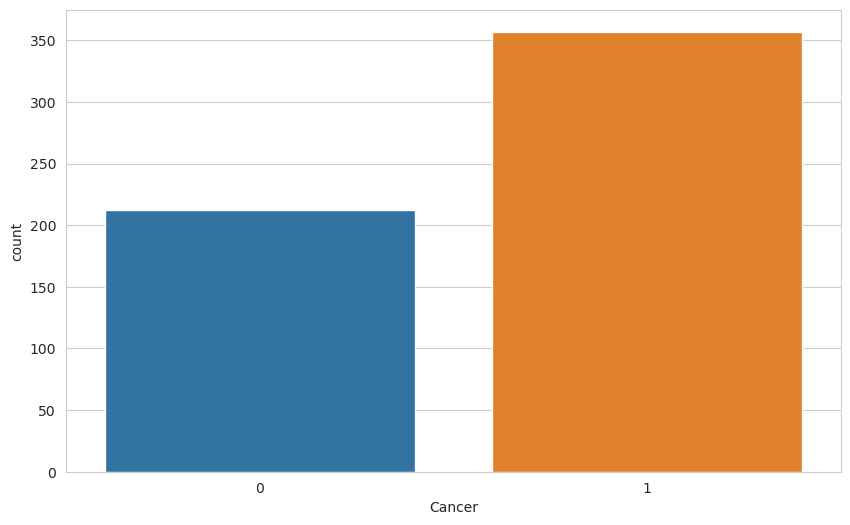

In [16]:
sns.countplot(df["Cancer"])

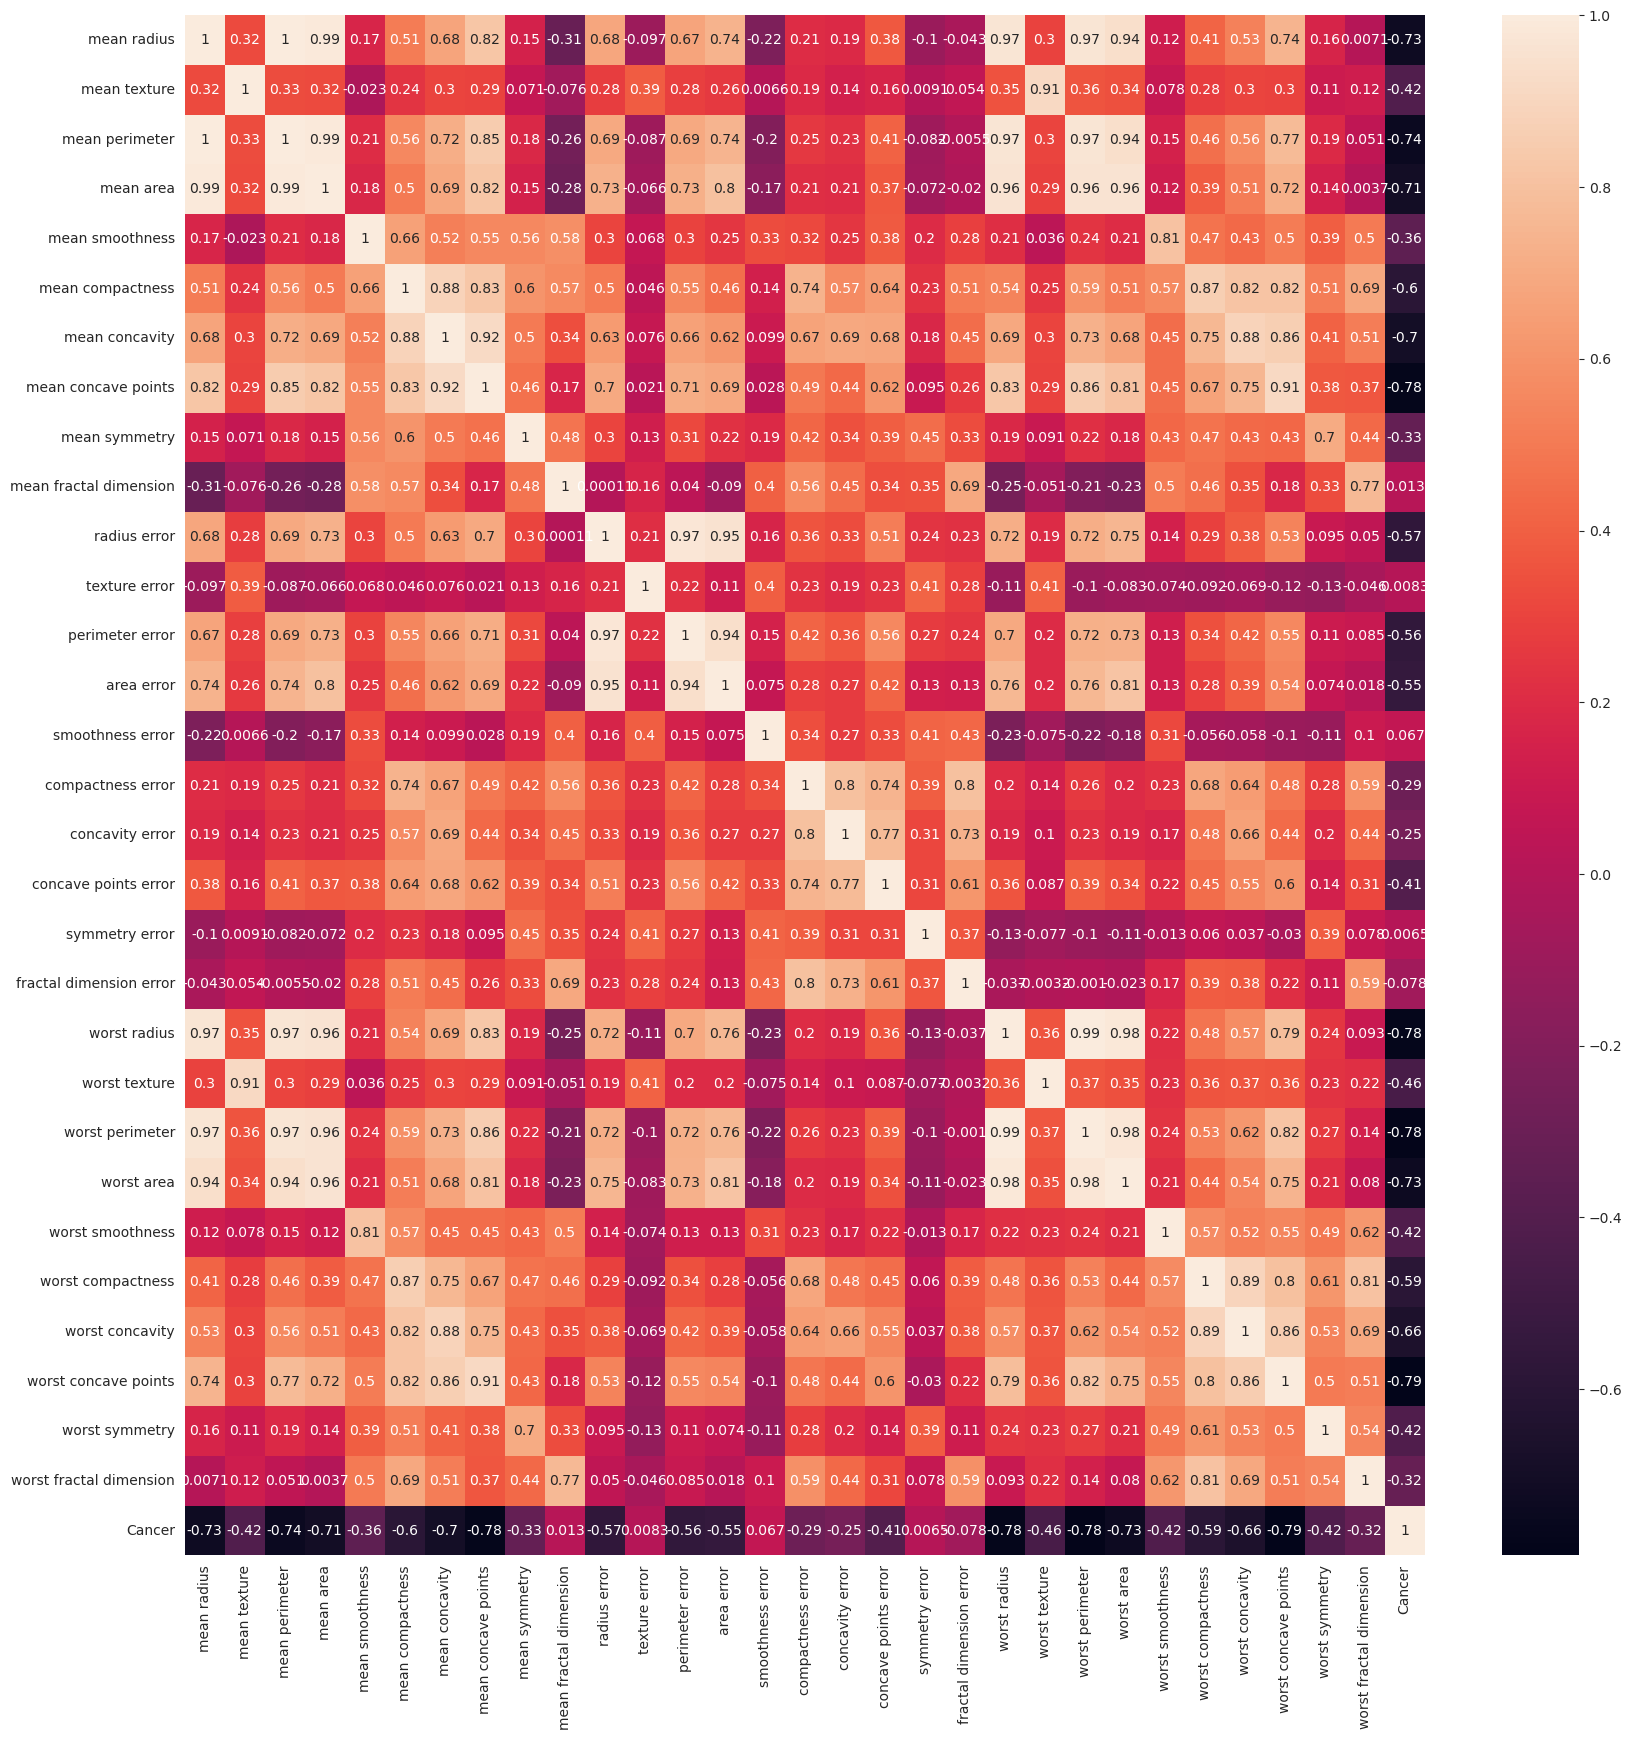

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

# Yüksek korelasyonlu şeyler var. örn: radius - mean perimeter
# Yüksek korelasyonlu olanları çıkartmakta fayda var. Modelin öğrenmesine fayda sağlamaz
# Feature importance lık bir durum yok ama bunları drop edeceğiz altta

In [18]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [19]:
df=df.drop(drop_list, axis=1)

In [20]:
df.shape

(569, 25)

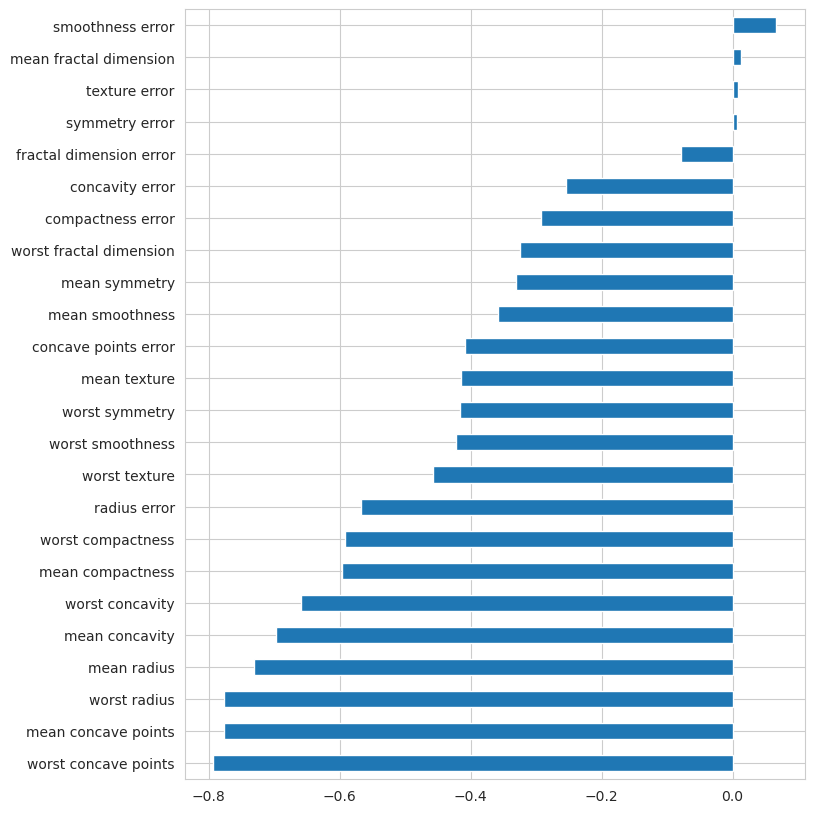

In [21]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");
# Target ile korelasyonlarına baktığımızda, negatif olanlar kötü huylularla pozitif ilişkisi olan featurelar
# Worst olan featurelar: En kötü 3  değerin ortalaması

## Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

In [24]:
seed = 42

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

2022-10-10 04:27:48.854753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 04:27:49.370263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 04:27:49.370312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-10 04:27:49.448524: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-10 04:27:50.503694: W tensorflow/stream_executor/platform/de

In [29]:
X_train.shape

(512, 24)

In [30]:
X_test.shape

(57, 24)

In [31]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# İlk layer ın nöron sayısı neden 36? Feature sayısını 1.5 katı sayısında başlıyorduk/öneriliryordu
# Genelde Huni şeklinde yapılması(giderek azalan) tercih edilir nöron sayılarını(36-18-9-1)(Alttaki resim)
# Featurelar çok fazla ve farklı bilgiler içeren feature lar var ve data büyükse uzayda komplex bir yapı oluşuyor
# .. O zaman hidden layerlarda relu yerine tanh daha çok kullanılır
# Classchat soru:akitvasyonu ilk relu ile başlayıp en son sigmoid 0 - 1 olduundan mı yapıyoruz hocam.
# John H: Sondakini mutlaka sigmoid yapmak zorundayız çünkü binary classification yapıyoruz burada
# .. Not olarak: Multiclass da :softmax, regression da:lineer yapıyorduk
# metrics = ["accuracy"] : Bunu yazmak zorunda değiliz ama accuracy yi de görmek istersek bunu da yazabiliriz(recall vs de yazabiliriz)
# Early stop da ben val_loss a göre karar ver diyebilir ya da bunun yerine "accuracy" ye göre karar ver de diyebiliriz
# class chat soru: hocam bazen fit ederken bütün epoch larda aynı loss değeri çıktığı oluyor mu
0# John H : Sabit kalmaz çok küçük değişim olur. Ben hiç karşılaşmadım

2022-10-10 04:27:53.182028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 04:27:53.182498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 04:27:53.182604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:27:53.182666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:27:53.182730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

0

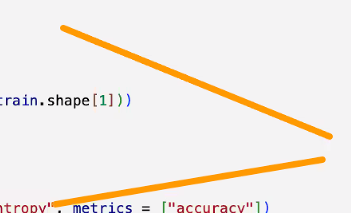

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)
# verbose=1 : raporlama ile ilgili
# validation_split = 0.1 niye kullandık bunu? Çünkü nasıl bir değişim olduğunu, overfit e gidiyor mu gitmiyor mu kontrol etmek için grafikte
# .. (loss_df.plot();) kod satırında
# Early stop yok şu anda 1000 epoch çalışacak

Epoch 1/1000
15/15 [==============================] - 1s 12ms/step - loss: 0.6738 - accuracy: 0.4500 - val_loss: 0.6209 - val_accuracy: 0.7308
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6674 - val_loss: 0.5688 - val_accuracy: 0.8077
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7783 - val_loss: 0.5240 - val_accuracy: 0.8654
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.8087 - val_loss: 0.4950 - val_accuracy: 0.9615
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.8761 - val_loss: 0.4289 - val_accuracy: 0.9231
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8804 - val_loss: 0.3959 - val_accuracy: 0.9615
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.9000 - val_loss: 0.3330 - val_accuracy: 0.9808
Epoch

In [33]:
model.summary()
# 1,747: Öğrenecek parametre sayısı(weight and bias)
# None: batch_size bilgisini göremeyince None geliyor
# 24 feature * 36 = 864 tane weight + 36 tane bias = 900
# 36 nöron * 18 =  648 tane weight + 18 bias = 666
# 18 nöron * 9 = 162 weight + 9 bias = 171
# Trainable params: 1,747 : Hepsi backpropagation ve gradient descent ile hesaplanmış 
# Non-trainable params: 0 : CNN var bu . CNN de bazı parametreleri öğrenebilir bazı parametreleri öğrenemez(öğrenmesine gerek yok)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.674     0.450     0.621         0.731
1 0.635     0.667     0.569         0.808
2 0.602     0.778     0.524         0.865
3 0.570     0.809     0.495         0.962
4 0.532     0.876     0.429         0.923

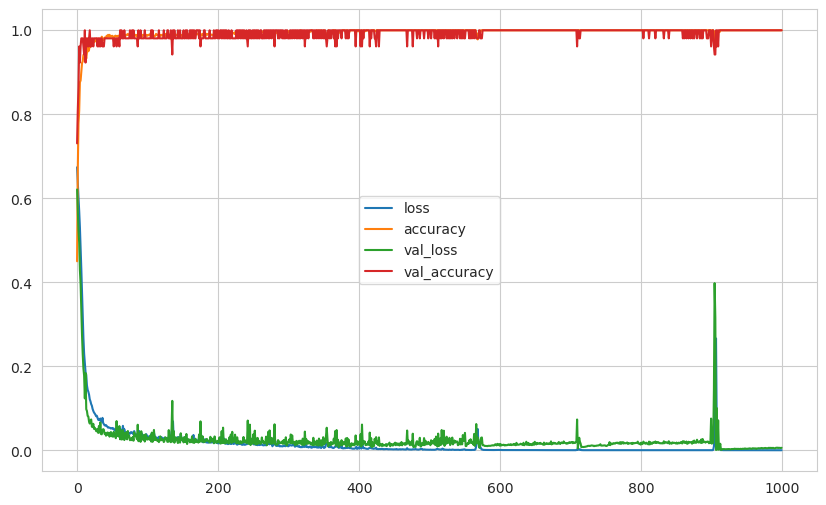

In [35]:
loss_df.plot(); # train ve validation için sonuçlar
# x ekseninde 400 den sonra aralık açılıyor. Buna early stop atacağız aşağıda
# accuracy    : train datası accuracy
# val_accuracy: validation datası accuracy

# 2. ders
# John H: "Seed" kullanmanıza rağmen aynı sonuçlar gelmiyorsa;
# .. "stackoveflow: how-to-get-reproducible-results-in-keras" konusu incelenebilir

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.6425575613975525, 0.8947368264198303]

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6425575613975525
accuracy :  0.8947368264198303


In [38]:
y_pred = model.predict(X_test) > 0.5  # ÖNEMLİ NOT: Tensorflow önceki versiyonlarında 0-1 sonuçlar üretiyordu.
# .. Yeni versiyonda üretmesi için > 0.5 diye bir eşik üretiyoruz burada(yapmamız gerekiyor(sigmoid için))
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 0 ve 1 in recall değerlerinin birbirine yakın olması, bize dengesizliğin olmadığını söylüyor
# Eğer dengesizlik olsaydı yukarda "class_weight" kullanarak modeli kurmamız gerekiyordu

2/2 [==============================] - 0s 3ms/step
[[19  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.94      0.89      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



### EarlyStopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
# monitor = "val_loss" : val_loss a(minimumuna --> mode="min") bakarak early stop yap
# mode = "min": Genelde min ya da max tercih ediyoruz. Eğer monitor da accuracy kullansaydık model="max" olacaktı
# .. mode ="auto" da seçilebiliyor ama yanlış sonuçlar verebilir

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])
# ÖNEMLİ NOT: callbacks = [early_stop] kullanıyorsak, validation_split kullanmak ZORUNDAYIZ
# 79 epoch da durdurmuş. Bunda 2 şey etkiliydi(learning rate ve patience)

Epoch 1/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6763 - accuracy: 0.6413 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6413 - val_loss: 0.6517 - val_accuracy: 0.5000
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6413 - val_loss: 0.6142 - val_accuracy: 0.5000
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.6413 - val_loss: 0.5666 - val_accuracy: 0.5192
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7217 - val_loss: 0.5034 - val_accuracy: 0.7308
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8522 - val_loss: 0.4619 - val_accuracy: 0.8269
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8891 - val_loss: 0.4046 - val_accuracy: 0.8654
Epoch

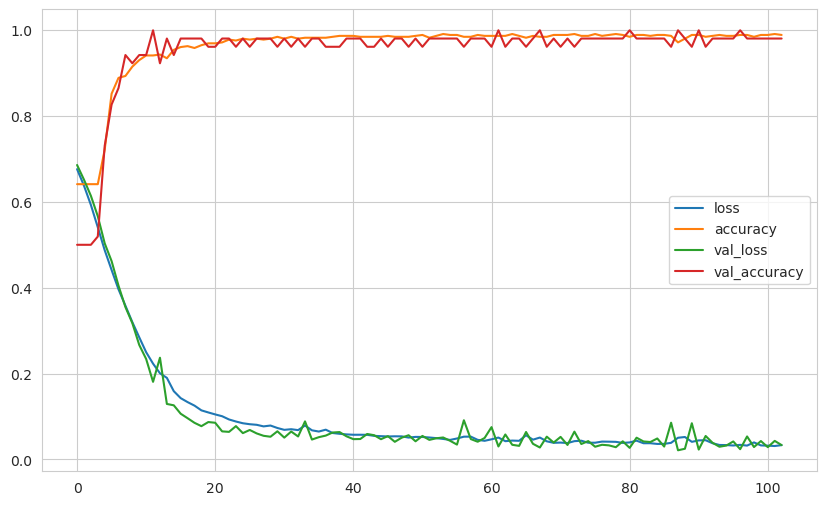

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();
# Overfitting durumu yok(val kısımlarını karşılaştırıyoruz)

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Accuracy değerimiz yükselmiş

loss :  0.18999159336090088
accuracy :  0.9122806787490845


In [46]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# early stopla çok iyi sonuç aldık
# Şimdi learning rate in etkisine bakalım

2/2 [==============================] - 0s 1ms/step
[[20  1]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.97      0.89      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57



### learning_rate

In [47]:
# learning rate optimizer ın içinde tanımlıydı

In [48]:
from tensorflow.keras.optimizers import Adam

In [49]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.005) # Farklı rakamlarla deneme yapmak lazım
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

# learning rate i de kullanınca 27 epoch da olay bitmiş. Önceden 79 du

Epoch 1/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6412 - accuracy: 0.6500 - val_loss: 0.4977 - val_accuracy: 0.9808
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8913 - val_loss: 0.2788 - val_accuracy: 1.0000
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9283 - val_loss: 0.1489 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9413 - val_loss: 0.0822 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9348 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9652 - val_loss: 0.0572 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9543 - val_loss: 0.0948 - val_accuracy: 0.9423
Epoch

<AxesSubplot:>

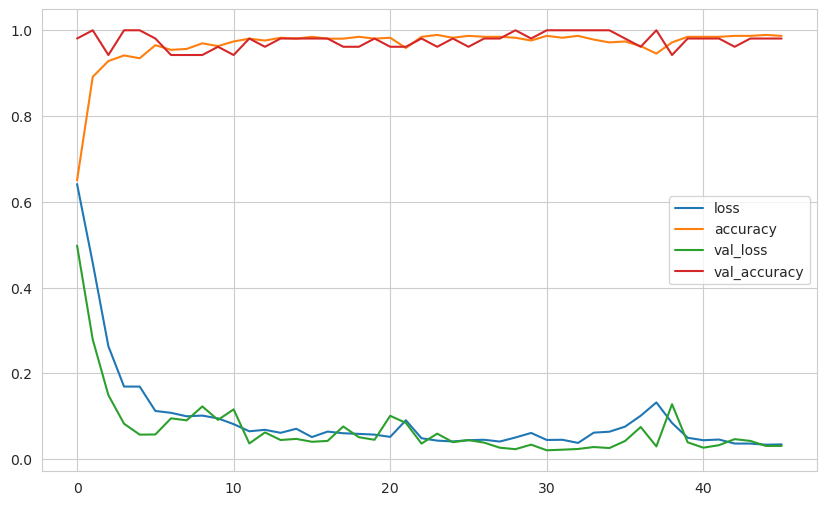

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

# Aynı accuracy sonucu verdi ama daha hızlı ulaşmış olduk.

loss :  0.19336187839508057
accuracy :  0.8771929740905762


loss :  0.12057707458734512
accuracy :  0.9473684430122375

In [54]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#

2/2 [==============================] - 0s 1ms/step
[[20  1]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.97      0.83      0.90        36

    accuracy                           0.88        57
   macro avg       0.87      0.89      0.87        57
weighted avg       0.89      0.88      0.88        57



### Dropout

In [55]:
# Overfitting i önlemek için kullanıyorduk. dropout(0.33) olsun
# Datanın bir kısmını bloke edip öbür kısmını gösteriyorum ve böylece ezberlemesini engelliyorduk
# Bir nevi ceza parametresi ekliyoruz gibi düşünebiliriz(Ridge ve lasso da yaptığımız gibi)

##### Bir iterasyonda ilk(sol üstteki) nöronun bağlantısını bloke ediyor(0.33 oranında. Yani burada 3 tane var 1 ini bloke ediyor ve model diğer 2 nöronla öğrenme yapıyor)
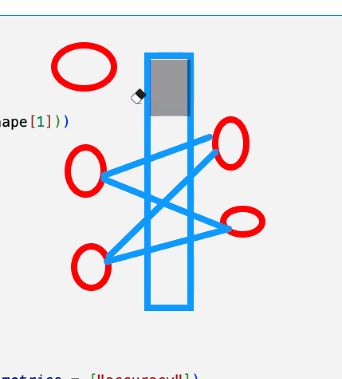

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)
# Class chat soru: Hocam early stopping ve dropout u birlikte kullanmıyoruz değil mi?
# John h: dropout kullandığımız için early stop kullanmadık ama ikisini de kullanabiliriz

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.7411 - accuracy: 0.5261 - val_loss: 0.7277 - val_accuracy: 0.5000
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.6109 - val_loss: 0.7112 - val_accuracy: 0.5000
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5674 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6348 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6652 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6630 - val_loss: 0.6732 - val_accuracy: 0.5000
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6848 - val_loss: 0.6580 - val_accuracy: 0.5000
Epoch

<AxesSubplot:>

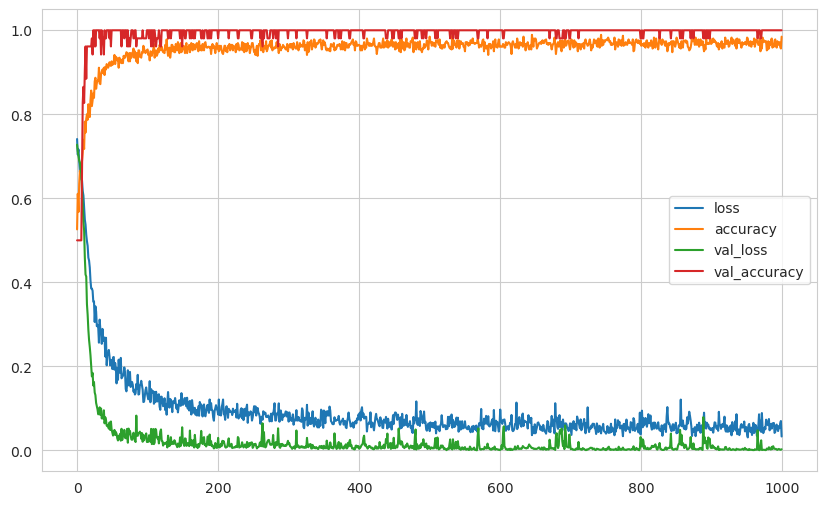

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# vall_loss ve val_accuracy beraber aynı seviyelerde gitmişler ve
# .. val_loss hep altta gitmiş(gayet iyi gitmiş). Sonuç olarak overfitting engellenmiş

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.2547575831413269
accuracy :  0.9473684430122375


In [61]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [62]:
# Deep learning de cross validation çok efficient değil. Çünkü calculation cost yüksek

In [63]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# scikit-learn ile tensorflow u sarmalama(wrappers) yapmışlar. Yani birlikte çalışıyorlar

In [64]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Tüm mimariyi bir fonksiyona bağladık altta model kısmında kullanacağız

In [65]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)
scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]
df_scores
# build_fn(built function) = build_classifier
# epochs = 100 * cv=10 = 1000 iterasyon. Bu bazen yetmeyebilir.
# .. O zaman yükseltmek lazım rakamları ve calculation cost oluşacak

2/2 [==============================] - 0s 2ms/step


test_accuracy  test_precision  test_recall  test_f1
1           0.962           0.968        0.968    0.968
2           1.000           1.000        1.000    1.000
3           0.980           0.972        1.000    0.986
4           1.000           1.000        1.000    1.000
5           0.922           0.895        1.000    0.944
6           0.961           0.971        0.971    0.971
7           1.000           1.000        1.000    1.000
8           1.000           1.000        1.000    1.000
9           1.000           1.000        1.000    1.000
10          0.980           0.962        1.000    0.980

In [66]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary
# Skorlarımız daha yüksek gelmiş

score_mean  score_std
acc       0.980      0.026
pre       0.977      0.033
rec       0.994      0.013
f1        0.985      0.019

## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [67]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam # optimizer isimleri
# Adam  : Adaptive moment estimation
# Nadam : Nesterov-accelerated Adaptive Moment Estimation

In [68]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [69]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])
# NOT: # grid search yaparken early stop olsun mu olmasın mı gibi tartışmalar var

# Class chat soru: AF için grid search var mı hocam?
# John Hoca: Yapılabilir ama ben kullanmadım ancak model kurma kısmını farklı şekilde yapmak gerekebilir her bir katman için
# .. belki yapılmış olabilir daha önce

Fitting 10 folds for each of 24 candidates, totalling 240 fits


2022-10-10 04:29:58.348000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 04:29:58.467370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 04:29:58.540685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/200


2022-10-10 04:30:02.228336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 04:30:02.229592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.230032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.230427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.230753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200


2022-10-10 04:30:02.560808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 04:30:02.561382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.561566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.561713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.561857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200


2022-10-10 04:30:02.960743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 04:30:02.961636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.961824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.962015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-10 04:30:02.962404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/200
13/13 [==============================] - 2s 35ms/step - loss: 0.6846 - accuracy: 0.6473 - val_loss: 0.7074 - val_accuracy: 0.4783
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6547 - accuracy: 0.6473 - val_loss: 0.6674 - val_accuracy: 0.4783
Epoch 3/200
13/13 [==============================] - 1s 35ms/step - loss: 0.6873 - accuracy: 0.4638 - val_loss: 0.6630 - val_accuracy: 0.7021
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6265 - accuracy: 0.6522 - val_loss: 0.6422 - val_accuracy: 0.4783
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6572 - accuracy: 0.7585 - val_loss: 0.6331 - val_accuracy: 0.8085
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.5954 - accuracy: 0.7053 - val_loss: 0.6166 - val_accuracy: 0.6304
Epoch 5/200
13/13 [==============================] - 2s 43ms/step - loss: 0.6897 - accuracy: 0.6401 - val_loss: 0.7167 - val_accuracy: 0.4681
Epoch 2/

2022-10-10 04:30:40.186408: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


13/13 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.6594 - val_loss: 0.6719 - val_accuracy: 0.7872
Epoch 141/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.8140 - val_loss: 0.6828 - val_accuracy: 0.7609
Epoch 169/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.6353 - val_loss: 0.6919 - val_accuracy: 0.4894
Epoch 144/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.5338 - val_loss: 0.6991 - val_accuracy: 0.3261
Epoch 150/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6982 - accuracy: 0.3599 - val_loss: 0.6812 - val_accuracy: 0.5319
Epoch 137/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.6498 - val_loss: 0.6655 - val_accuracy: 0.8511
Epoch 113/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6678 - accuracy: 0.6715 - val_loss: 0.6869 - val_accuracy: 0.4894
Epoch 107/200

13/13 [==============================] - 0s 10ms/step - loss: 0.1227 - accuracy: 0.9614 - val_loss: 0.0746 - val_accuracy: 0.9362
Epoch 10/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0568 - val_accuracy: 0.9787
Epoch 46/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.1130 - val_accuracy: 0.9362
Epoch 61/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0227 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9787
Epoch 174/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0118 - accuracy: 0.9952 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 72/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9903 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 137/200
Epoch 162/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0376 - accuracy: 0.9855 - val_loss: 0.0296 - val_accuracy: 0.978

13/13 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 25/200
Epoch 23/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3913 - accuracy: 0.8792 - val_loss: 0.4027 - val_accuracy: 0.9348
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0470 - accuracy: 0.9879 - val_loss: 0.0703 - val_accuracy: 0.9574
Epoch 43/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 0.9565 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 17/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 105/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 96/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0581 - accuracy: 0.9807 - val_loss: 0.0377 - val_accuracy: 0.9787
Epoch

13/13 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9855 - val_loss: 0.0641 - val_accuracy: 0.9574
Epoch 60/200
Epoch 13/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0405 - accuracy: 0.9928 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 88/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0666 - val_accuracy: 0.9574
Epoch 44/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0821 - accuracy: 0.9710 - val_loss: 0.0544 - val_accuracy: 0.9574
Epoch 22/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0382 - accuracy: 0.9855 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 45/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0282 - accuracy: 0.9855 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 103/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1051 - accuracy: 0.9686 - val_loss: 0.0435 - val_accuracy: 1.0000
E

Epoch 11/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 57/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0619 - accuracy: 0.9783 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 35/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9855 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 102/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0577 - accuracy: 0.9783 - val_loss: 0.1060 - val_accuracy: 0.9574
Epoch 74/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0828 - accuracy: 0.9686 - val_loss: 0.0418 - val_accuracy: 0.9787
Epoch 26/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1308 - accuracy: 0.9565 - val_loss: 0.1078 - val_accuracy: 0.9362
Epoch 12/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0559 - accuracy: 0.9734 - val_loss: 0.0187 - val_accuracy: 0.9787
Epoch

13/13 [==============================] - 0s 13ms/step - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 115/200
13/13 [==============================] - 0s 11ms/step - loss: 0.1454 - accuracy: 0.9372 - val_loss: 0.1185 - val_accuracy: 0.9574
Epoch 10/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0419 - accuracy: 0.9903 - val_loss: 0.0382 - val_accuracy: 0.9787
Epoch 88/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0528 - accuracy: 0.9831 - val_loss: 0.0499 - val_accuracy: 0.9574
Epoch 40/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.9855 - val_loss: 0.0305 - val_accuracy: 0.9787
Epoch 72/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0422 - accuracy: 0.9831 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 48/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0687 - accuracy: 0.9807 - val_loss: 0.0627 - val_accuracy: 0.9574
Epoch 25/200


13/13 [==============================] - 2s 42ms/step - loss: 0.6823 - accuracy: 0.6377 - val_loss: 0.7040 - val_accuracy: 0.4681
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.6787 - accuracy: 0.6250Epoch 55/200
Epoch 122/200
Epoch 31/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7068 - accuracy: 0.3551 - val_loss: 0.6690 - val_accuracy: 0.5217
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0298 - accuracy: 0.9879 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 79/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 0.9662 - val_loss: 0.0692 - val_accuracy: 0.9574
Epoch 47/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9686 - val_loss: 0.0731 - val_accuracy: 0.9787
Epoch 32/200
Epoch 17/200
 1/13 [=>............................] - ETA: 0s - loss: 0.2585 - accuracy: 0.9062Epoch 8/200
Epoch 56/200
13/13 [==============================] - 0s 8m

2022-10-10 04:31:25.674863: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


13/13 [==============================] - 0s 10ms/step - loss: 0.7011 - accuracy: 0.3551 - val_loss: 0.6664 - val_accuracy: 0.5217
Epoch 28/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6845 - accuracy: 0.4783 - val_loss: 0.6698 - val_accuracy: 0.6170
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9783 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 68/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 144/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0598 - accuracy: 0.9855 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 54/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0618 - accuracy: 0.9758 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 39/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6803 - accuracy: 0.6377 - val_loss: 0.7016 - val_accuracy: 0.4681
Epoch 25/200
13/

13/13 [==============================] - 0s 13ms/step - loss: 0.0503 - accuracy: 0.9783 - val_loss: 0.0592 - val_accuracy: 0.9787
Epoch 64: early stopping
13/13 [==============================] - 0s 9ms/step - loss: 0.7068 - accuracy: 0.3527 - val_loss: 0.6584 - val_accuracy: 0.5217
Epoch 39/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0509 - val_accuracy: 0.9787
Epoch 50/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6793 - accuracy: 0.6377 - val_loss: 0.7005 - val_accuracy: 0.4681
Epoch 36/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 112/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.9831 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 156/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6973 - accuracy: 0.3623 - val_loss: 0.6646 - val_accuracy: 0.5435
Epo

13/13 [==============================] - 0s 10ms/step - loss: 0.0271 - accuracy: 0.9903 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 159/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7058 - accuracy: 0.3527 - val_loss: 0.6581 - val_accuracy: 0.5217
Epoch 43/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.9976 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 116/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6965 - accuracy: 0.3623 - val_loss: 0.6642 - val_accuracy: 0.5435
Epoch 44/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6823 - accuracy: 0.4903 - val_loss: 0.6684 - val_accuracy: 0.6596
Epoch 22/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0951 - val_accuracy: 0.9565
Epoch 160/200
13/13 [==============================] - 0s 8ms/step - loss: 9.9127e-04 - accuracy: 1.0000 - val_loss: 4.7488e-04 - val_accuracy: 1.0000
Epoch

2022-10-10 04:31:28.228654: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


13/13 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9952 - val_loss: 0.0396 - val_accuracy: 0.9783
Epoch 169/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.3696 - val_loss: 0.6630 - val_accuracy: 0.5435
Epoch 52/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0408 - accuracy: 0.9855 - val_loss: 0.1078 - val_accuracy: 0.9574
Epoch 125/200
Epoch 64/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6810 - accuracy: 0.5121 - val_loss: 0.6674 - val_accuracy: 0.6809
Epoch 31/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.3527 - val_loss: 0.6573 - val_accuracy: 0.5217
Epoch 53/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6781 - accuracy: 0.6377 - val_loss: 0.6992 - val_accuracy: 0.4681
Epoch 49/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6871 - accuracy: 0.6425 - val_loss: 0.7305 - val_accuracy: 0.4681
Epoc

13/13 [==============================] - 0s 11ms/step - loss: 0.7033 - accuracy: 0.3527 - val_loss: 0.6573 - val_accuracy: 0.5217
Epoch 54/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.3696 - val_loss: 0.6627 - val_accuracy: 0.5435
Epoch 54/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6870 - accuracy: 0.6425 - val_loss: 0.7303 - val_accuracy: 0.4681
Epoch 41/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0656 - accuracy: 0.9710 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 127/200
Epoch 66/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6780 - accuracy: 0.6377 - val_loss: 0.6990 - val_accuracy: 0.4681
Epoch 33/200
Epoch 51/200
Epoch 171/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7030 - accuracy: 0.3527 - val_loss: 0.6572 - val_accuracy: 0.5217
Epoch 55/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.3696 - val_loss: 0.662

13/13 [==============================] - 0s 17ms/step - loss: 0.6863 - accuracy: 0.3889 - val_loss: 0.6590 - val_accuracy: 0.5435
Epoch 77/200
13/13 [==============================] - 0s 15ms/step - loss: 0.6840 - accuracy: 0.6425 - val_loss: 0.7269 - val_accuracy: 0.4681
Epoch 64/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6976 - accuracy: 0.3575 - val_loss: 0.6553 - val_accuracy: 0.5217
Epoch 79/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6758 - accuracy: 0.6377 - val_loss: 0.6967 - val_accuracy: 0.4681
Epoch 1/200
Epoch 74/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.9855 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 88/200
13/13 [==============================] - 0s 18ms/step - loss: 0.6839 - accuracy: 0.6473 - val_loss: 0.7068 - val_accuracy: 0.4681
Epoch 25/200
Epoch 78/200
13/13 [==============================] - 0s 21ms/step - loss: 0.6770 - accuracy: 0.5990 - val_loss: 0.6644 - val_accu

13/13 [==============================] - 0s 9ms/step - loss: 0.6735 - accuracy: 0.6763 - val_loss: 0.6618 - val_accuracy: 0.8511
Epoch 81/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7104 - accuracy: 0.3551 - val_loss: 0.6840 - val_accuracy: 0.5319
Epoch 19/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.3671 - val_loss: 0.6534 - val_accuracy: 0.5217
Epoch 104/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.4565 - val_loss: 0.6550 - val_accuracy: 0.6304
Epoch 102/200
13/13 [==============================] - 0s 16ms/step - loss: 0.6898 - accuracy: 0.3575 - val_loss: 0.6874 - val_accuracy: 0.3617
Epoch 99/200
Epoch 19/200
13/13 [==============================] - 0s 15ms/step - loss: 0.6889 - accuracy: 0.3599 - val_loss: 0.6427 - val_accuracy: 0.5319
Epoch 49/200
13/13 [==============================] - 0s 14ms/step - loss: 0.6908 - accuracy: 0.5918 - val_loss: 0.6928 - val_accuracy: 0.3830

13/13 [==============================] - 0s 11ms/step - loss: 0.6666 - accuracy: 0.6377 - val_loss: 0.6877 - val_accuracy: 0.4681
Epoch 174/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6943 - accuracy: 0.3551 - val_loss: 0.6753 - val_accuracy: 0.5319
Epoch 95/200
13/13 [==============================] - 0s 17ms/step - loss: 0.6749 - accuracy: 0.3599 - val_loss: 0.6734 - val_accuracy: 0.3617
Epoch 98/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6425 - val_loss: 0.7143 - val_accuracy: 0.4681
Epoch 164/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6598 - accuracy: 0.8454 - val_loss: 0.6499 - val_accuracy: 0.9787
Epoch 157/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6771 - accuracy: 0.3599 - val_loss: 0.6378 - val_accuracy: 0.5319
Epoch 122/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.3986 - val_loss: 0.6483 - val_accuracy: 0.5435
Epoch 177/2

2022-10-10 04:31:47.274426: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


13/13 [==============================] - 0s 8ms/step - loss: 0.6714 - accuracy: 0.3671 - val_loss: 0.6700 - val_accuracy: 0.3617
Epoch 119/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6681 - accuracy: 0.6425 - val_loss: 0.7121 - val_accuracy: 0.4681
Epoch 186/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6764 - accuracy: 0.4251 - val_loss: 0.6467 - val_accuracy: 0.5435
Epoch 199/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.7319 - val_loss: 0.6846 - val_accuracy: 0.5745
Epoch 131/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6433 - accuracy: 0.8382 - val_loss: 0.6344 - val_accuracy: 0.8913
Epoch 198/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6738 - accuracy: 0.3599 - val_loss: 0.6359 - val_accuracy: 0.5319
Epoch 144/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6680 - accuracy: 0.6425 - val_loss: 0.7120 - val_accuracy: 0.4681
Epoch 187/20

13/13 [==============================] - 0s 8ms/step - loss: 0.6732 - accuracy: 0.3599 - val_loss: 0.6355 - val_accuracy: 0.5319
Epoch 148/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6903 - accuracy: 0.3575 - val_loss: 0.6727 - val_accuracy: 0.5319
Epoch 121/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6536 - accuracy: 0.8792 - val_loss: 0.6440 - val_accuracy: 0.9787
Epoch 186/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6675 - accuracy: 0.6425 - val_loss: 0.7116 - val_accuracy: 0.4681
Epoch 191/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.3696 - val_loss: 0.6690 - val_accuracy: 0.3617
Epoch 125/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6209 - accuracy: 0.7681 - val_loss: 0.5247 - val_accuracy: 0.8511
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6558 - accuracy: 0.7560 - val_loss: 0.6712 - val_accuracy: 0.6170
Epoch 148/20

13/13 [==============================] - 0s 11ms/step - loss: 0.6551 - accuracy: 0.7585 - val_loss: 0.6703 - val_accuracy: 0.6170
Epoch 152/200
 1/13 [=>............................] - ETA: 0s - loss: 0.6540 - accuracy: 0.4375Epoch 194/200
Epoch 151/200
13/13 [==============================] - 0s 14ms/step - loss: 0.6899 - accuracy: 0.3575 - val_loss: 0.6724 - val_accuracy: 0.5319
Epoch 124/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6527 - accuracy: 0.8792 - val_loss: 0.6432 - val_accuracy: 0.9787
Epoch 1/200
Epoch 190/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.3720 - val_loss: 0.6685 - val_accuracy: 0.3617
Epoch 128/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6670 - accuracy: 0.6425 - val_loss: 0.7112 - val_accuracy: 0.4681
Epoch 195/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2832 - accuracy: 0.9034 - val_loss: 0.1784 - val_accuracy: 0.9574
Epoch 5/200
13/13 [============

13/13 [==============================] - 0s 8ms/step - loss: 0.0796 - accuracy: 0.9638 - val_loss: 0.0407 - val_accuracy: 0.9787
Epoch 59/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1120 - accuracy: 0.9686 - val_loss: 0.0762 - val_accuracy: 0.9574
Epoch 12/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1296 - accuracy: 0.9879 - val_loss: 0.0895 - val_accuracy: 1.0000
Epoch 57/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6759 - accuracy: 0.7802 - val_loss: 0.6796 - val_accuracy: 0.6383
Epoch 191/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 29/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0349 - val_accuracy: 0.9787
Epoch 60/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1249 - accuracy: 0.9928 - val_loss: 0.1638 - val_accuracy: 1.0000
Epoch 35/200
Epoch

13/13 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.9758 - val_loss: 0.0377 - val_accuracy: 0.9787
Epoch 26/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.0255 - val_accuracy: 0.9787
Epoch 44/200
13/13 [==============================] - 0s 8ms/step - loss: 0.1088 - accuracy: 0.9831 - val_loss: 0.0835 - val_accuracy: 0.9787
Epoch 72/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0965 - accuracy: 0.9903 - val_loss: 0.1425 - val_accuracy: 0.9787
Epoch 49/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.4710 - val_loss: 0.6585 - val_accuracy: 0.4255
Epoch 193/200
 1/13 [=>............................] - ETA: 0s - loss: 0.6573 - accuracy: 0.3750Epoch 191/200
Epoch 1/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9879 - val_loss: 0.0656 - val_accuracy: 0.9574
Epoch 27/200
13/13 [==============================] 

13/13 [==============================] - 0s 7ms/step - loss: 0.1704 - accuracy: 0.9493 - val_loss: 0.1751 - val_accuracy: 0.9362
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9903 - val_loss: 0.0704 - val_accuracy: 1.0000
Epoch 87/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.9903 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 41/200
13/13 [==============================] - 0s 8ms/step - loss: 0.3831 - accuracy: 0.9082 - val_loss: 0.2278 - val_accuracy: 0.9783
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2299 - accuracy: 0.9420 - val_loss: 0.1723 - val_accuracy: 0.9362
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 1.0000
Epoch 63/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 0.9831 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 8/200
Epoch 88/2

13/13 [==============================] - 0s 7ms/step - loss: 0.1359 - accuracy: 0.9517 - val_loss: 0.1216 - val_accuracy: 0.9362
Epoch 58/200
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 0.9541 - val_loss: 0.1103 - val_accuracy: 0.9574
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9787
Epoch 153/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9686 - val_loss: 0.0810 - val_accuracy: 0.9574
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 10/200
Epoch 59/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9831 - val_loss: 0.0803 - val_accuracy: 0.9574
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1

13/13 [==============================] - 0s 7ms/step - loss: 0.1607 - accuracy: 0.9396 - val_loss: 0.1313 - val_accuracy: 0.9574
Epoch 23/200
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9952 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 72/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 166: early stopping
13/13 [==============================] - 0s 9ms/step - loss: 0.2377 - accuracy: 0.9251 - val_loss: 0.1132 - val_accuracy: 1.0000
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 0.9879 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 24/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0594 - accuracy: 0.9831 - val_loss: 0.0447 - val_accuracy: 0.9787
Epoch 24/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0647 - accuracy: 0.9807 - val_loss: 0.0396 - val_accuracy: 0

13/13 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9734 - val_loss: 0.1117 - val_accuracy: 0.9348
Epoch 37/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 55/200
Epoch 28/200
13/13 [==============================] - 0s 14ms/step - loss: 0.0944 - accuracy: 0.9589 - val_loss: 0.0551 - val_accuracy: 0.9787
Epoch 21/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1240 - accuracy: 0.9807 - val_loss: 0.1671 - val_accuracy: 0.9787
Epoch 29/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0584 - accuracy: 0.9758 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 38/200
13/13 [==============================] - 2s 36ms/step - loss: 0.6743 - accuracy: 0.6401 - val_loss: 0.5692 - val_accuracy: 0.9787
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1093 - accuracy: 0.9565 - val_loss: 0.0360 - val_accuracy: 0.9787
Ep

13/13 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.3575 - val_loss: 0.6315 - val_accuracy: 0.5217
Epoch 22/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0879 - accuracy: 0.9686 - val_loss: 0.0409 - val_accuracy: 0.9787
Epoch 30/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0978 - accuracy: 0.9686 - val_loss: 0.1808 - val_accuracy: 0.9362
Epoch 18/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1065 - accuracy: 0.9565 - val_loss: 0.0620 - val_accuracy: 0.9574
Epoch 21/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0846 - val_accuracy: 0.9574
Epoch 63/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9903 - val_loss: 0.0661 - val_accuracy: 0.9574
Epoch 34/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0405 - accuracy: 0.9928 - val_loss: 0.0380 - val_accuracy: 0.9787
Epoch 22/200
Epoch

13/13 [==============================] - 0s 9ms/step - loss: 0.6787 - accuracy: 0.8623 - val_loss: 0.6762 - val_accuracy: 0.9149
Epoch 158/200
Epoch 138/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1212 - accuracy: 0.9541 - val_loss: 0.0529 - val_accuracy: 0.9787
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6490 - accuracy: 0.6401 - val_loss: 0.6770 - val_accuracy: 0.4681
Epoch 191/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6565 - accuracy: 0.8285 - val_loss: 0.6619 - val_accuracy: 0.7660
Epoch 195/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.9831 - val_loss: 0.0634 - val_accuracy: 0.9783
Epoch 138/200
Epoch 51/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.6691 - val_loss: 0.6719 - val_accuracy: 0.7234
Epoch 140/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6754 - accuracy: 0.8551 - val_loss: 0.6669 - val_ac

2022-10-10 04:33:00.457130: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


7/7 [==============================] - 0s 9ms/step - loss: 0.0885 - accuracy: 0.9686 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 64/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1125 - accuracy: 0.9686 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 71/200
Epoch 41/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0627 - val_accuracy: 0.9574
Epoch 60/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.9928 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 70/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0699 - accuracy: 0.9734 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 80/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0614 - accuracy: 0.9879 - val_loss: 0.0575 - val_accuracy: 0.9574
Epoch 74/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.0628 - val_accuracy: 0.9574
Epoch 65/200
7/7

In [ ]:
grid_model.best_score_ # accuracy : 0.974

In [ ]:
grid_model.best_params_ # default değerler geldi

In [ ]:
#grid_model.cv_results_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

# Class chat soru: Hocam rank_test_score neye göre belirleniyor
# John H: mean_test_score(accuracy) ye göre

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# default değerler olduğu için aynı değerler geldi

# class chat soru : hocam gerçek hayatta random seed kullnamak mantıklı mı
# John H: Şu durumda mantıklı, learning rate i test etmek istiyorsam seed kullanmak mantıklı
# .. çünkü değişim learning rate den mi kaynaklanıyor yoksa ağırlıklardan mı kaynaklanıyor bilemeyiz tam
# .. Yani random seed yerine 10/30 kere çalıştırmak daha mantıklı.

## ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

In [ ]:
# 3. ders
# NOT: ROC : multiclass da kullanılmıyordu(trick yaparak kullanılabiliyordu. Bir sınıfı alıp diğer sınıfları da bir sınıf kabul ederek)

### for keras models

In [ ]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# fpr(false pozitive ratio), tpr(true pozitive ratio), thresholds
# Ödevde sizinki inbalanced data olacağı için precision-recall curve bakabilirsiniz

In [ ]:
roc_auc_score(y_test, y_pred_proba)

### for gridsearchcv model

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
# gridsearchde de default değerler gelmişti o yüzden üstteki grafik ile bu grafik aynı sonucu veriyor

In [ ]:
roc_auc_score(y_test, y_pred_proba)

## Saving Final Model and Scaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

# Önceden validation_split kullanıyorduk, burada validation_data = (X_test, y_test) kullandık
# validation_split=0.1 train datasının yüzde %10 unu ayırıyorduk
# validation_data = (X_test, y_test) : validation olarak X_test ve y_test i kullan. Çünkü bu benim final modelim
# .. mümkün olduğunca fazla data ile eğitim yapalım yani train i split etmeyelim. Early stop kullandığımız için bunu yazdık
# .. Yukarda bahsetmiştik Early stop varsa validation datası kullanmak ZORUNDAYIZ

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Sonuçlar gayet iyi.  Bu sonuçları save edelim

In [ ]:
model.save('model_cancer.h5') # save ettik. Scaler ı da yukarda dump etmiştik zaten

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [ ]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient # Sıfırıncı satırı prediction için kullanalım(Normalde çok sağlıklı değil bu datayı gördüğü için)

In [ ]:
single_patient = scaler_cancer.transform(single_patient) # Scale imizi transform yapıyoruz yoksa sonuçlarımız yanlış gelir
single_patient

In [ ]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

In [ ]:
df["Cancer"].iloc[0] # Prediction sonucu # 0. satırdaki sonuçta zaten 0 dı

In [ ]:
# class chat soru: Hocam, final modeldeki modele nasıl karar verdik?
# grid search ile gelen parametreleri kullanarak final modele karar verdik

## Comparison with ML

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# class chat soru: drop out aşamasında oranları neye göre belirliyoruz? Belirli bir kuralı var mı?
# John H: Yok ama genelde grid search e eklenebiliyor

# class chat soru: tensörlerden bahsetmiştik hocam burada tensör olayı tam olarak nerede
# John H: CNN de kullanacağız daha çok. Şimdiye kadar kullanmadık bunu

In [ ]:
# 22:20 de bitti ders. Assignmentdan bahsedildi
"""
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(‘balanced’,
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights
"""

"""
early_stop = EarlyStopping(monitor=“val_recall”,
                           mode=“max”,
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)
"""

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___